# 1: Download Data for Deadly Collision Analysis

The following file looks to download and convert the various files required for this study into dataframes for data cleaning and analysis.

In [1]:
# Import libraries
import os
import json
import pandas as pd
import seaborn as sns
from datetime import datetime
import requests
import geopandas as gpd

### 1.1 Downloading Deadly Collision Data

In [2]:
# Following code pulls dictionary (.json file) on motor collisions
motor_collisions = (requests.
                    get('https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/0b6d3a00-7de1-440b-b47c-7252fd13929f/resource/355d4464-eb3c-4780-af79-43dd533ae906/download/Motor%20Vehicle%20Collisions%20with%20KSI%20Data.geojson').
                    json()
                   )

In [3]:
# Initialize an empty list to store flattened dictionaries
flat_motor_collisions = []

# Iterate through the 'features' list in the JSON motor_collisions
for feature in motor_collisions['features']:
    # properties entail the characteristics of the crash
    properties = feature['properties']
    # geometry entails the location
    geometry = feature['geometry']
    flat_properties = properties.copy()
    flat_properties.update(geometry)
    flat_motor_collisions.append(flat_properties)
    
# Create a motor_collisions DataFrame from the flattened motor_collisions
motor_collisions_df = pd.DataFrame(flat_motor_collisions)

In [4]:
motor_collisions_df.head()

_id  ACCNUM  YEAR        DATE TIME          STREET1         STREET2 OFFSET  \
0    1  892658  2006  2006-03-11  852       BLOOR ST W     DUNDAS ST W   None   
1    2  892658  2006  2006-03-11  852       BLOOR ST W     DUNDAS ST W   None   
2    3  892810  2006  2006-03-11  915  MORNINGSIDE AVE  SHEPPARD AVE E   None   
3    4  893184  2006  2006-01-01  236     WOODBINE AVE     O CONNOR DR   None   
4    5  892810  2006  2006-03-11  915  MORNINGSIDE AVE  SHEPPARD AVE E   None   

       ROAD_CLASS               DISTRICT  ...  REDLIGHT ALCOHOL DISABILITY  \
0  Major Arterial  Toronto and East York  ...      None    None       None   
1  Major Arterial  Toronto and East York  ...      None    None       None   
2  Major Arterial            Scarborough  ...       Yes    None       None   
3  Major Arterial  Toronto and East York  ...      None     Yes       None   
4  Major Arterial            Scarborough  ...       Yes    None       None   

  HOOD_158 NEIGHBOURHOOD_158 HOOD_140      NEIGHBOURHOOD_140 DIVISION  \
0       88   High Park North       88   High Park North (88)      D11   
1       88   High Park North       88   High Park North (88)      D11   
2      146      Malvern East      132          Malvern (132)      D42   
3       60  Woodbine-Lumsden       60  Woodbine-Lumsden (60)      D55   
4      146      Malvern East      132          Malvern (132)      D42   

         type                coordinates  
0  MultiPoint   [[-79.45249, 43.656345]]  
1  MultiPoint   [[-79.45249, 43.656345]]  
2  MultiPoint  [[-79.199786, 43.801943]]  
3  MultiPoint  [[-79.318797, 43.699595]]  
4  MultiPoint  [[-79.199786, 43.801943]]  

[5 rows x 54 columns]

### 1.2 Downloading Traffic and Intersection data
This section looks at downloading intersection and traffic volumes for the analysis. 

In [5]:
# Data that includes strictly intersection info
intersections = pd.read_csv('https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/traffic-volumes-at-intersections-for-all-modes/resource/b6b2cb6f-0528-48ef-b605-4b56e4ce49d6/download/locations.csv')
intersections.head()

_id  location_id                                           location  \
0    1         1146                    ELLESMERE RD AT PARKINGTON CRES   
1    2         1981     YORK MILLS RD E/B & W/B TO DON VALLEY PKWY N/B   
2    3         3468                     PARKSIDE DR N/B S OF SPRING RD   
3    4         3925                       RIPLEY AVE AT SOUTH KINGSWAY   
4    5         3926  BLOOR ST AT SOUTH KINGSWAY & RIVERVIEW GARDENS...   

         lng        lat  centreline_type  centreline_id      px  \
0 -79.246254  43.773319              2.0     13446642.0  2296.0   
1 -79.334658  43.757336              1.0       440171.0     NaN   
2 -79.454442  43.640512              1.0     30010748.0     NaN   
3 -79.475274  43.636780              2.0     13468657.0     NaN   
4 -79.485752  43.648312              2.0     13467247.0   334.0   

  latest_count_date  
0        2022-12-17  
1        2004-04-08  
2        2021-12-15  
3        2022-01-27  
4        2022-05-10

In [6]:
# Data from 2000 to 2009
vol_00to09 = pd.read_csv('https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/traffic-volumes-at-intersections-for-all-modes/resource/bb7554d9-cd5d-4fad-aa5b-97339a9018df/download/raw-data-2000-2009.csv')
vol_00to09.head()

_id  count_id  count_date  location_id  \
0    1      8180  2000-01-18         4126   
1    2      8180  2000-01-18         4126   
2    3      8180  2000-01-18         4126   
3    4      8180  2000-01-18         4126   
4    5      8180  2000-01-18         4126   

                                location        lng        lat  \
0  EGLINTON AVE AT PHARMACY AVE (PX 452) -79.297515  43.725651   
1  EGLINTON AVE AT PHARMACY AVE (PX 452) -79.297515  43.725651   
2  EGLINTON AVE AT PHARMACY AVE (PX 452) -79.297515  43.725651   
3  EGLINTON AVE AT PHARMACY AVE (PX 452) -79.297515  43.725651   
4  EGLINTON AVE AT PHARMACY AVE (PX 452) -79.297515  43.725651   

   centreline_type  centreline_id     px  ... ex_peds wx_peds  nx_bike  \
0              2.0     13453978.0  452.0  ...     7.0    17.0      0.0   
1              2.0     13453978.0  452.0  ...    12.0     4.0      1.0   
2              2.0     13453978.0  452.0  ...     7.0     3.0      0.0   
3              2.0     13453978.0  452.0  ...     9.0     4.0      0.0   
4              2.0     13453978.0  452.0  ...    10.0     4.0      3.0   

   sx_bike  ex_bike  wx_bike  nx_other  sx_other  ex_other  wx_other  
0      0.0      0.0      0.0       0.0       0.0       0.0       0.0  
1      0.0      0.0      0.0       0.0       0.0       0.0       0.0  
2      0.0      0.0      0.0       0.0       0.0       0.0       0.0  
3      0.0      0.0      0.0       0.0       0.0       0.0       0.0  
4      0.0      3.0      0.0       0.0       0.0       0.0       0.0  

[5 rows x 60 columns]

In [7]:
vol_10to19 = pd.read_csv('https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/traffic-volumes-at-intersections-for-all-modes/resource/1f60c668-bb8e-4e1e-ac72-3c6558a03fea/download/raw-data-2010-2019.csv')
vol_10to19.head()

_id  count_id  count_date  location_id                  location  \
0    1     25081  2010-01-12        32187  LILLIAN ST AT SOUDAN AVE   
1    2     25081  2010-01-12        32187  LILLIAN ST AT SOUDAN AVE   
2    3     25081  2010-01-12        32187  LILLIAN ST AT SOUDAN AVE   
3    4     25081  2010-01-12        32187  LILLIAN ST AT SOUDAN AVE   
4    5     25081  2010-01-12        32187  LILLIAN ST AT SOUDAN AVE   

         lng        lat  centreline_type  centreline_id  px  ... ex_peds  \
0 -79.393259  43.705283              2.0     13457294.0 NaN  ...     0.0   
1 -79.393259  43.705283              2.0     13457294.0 NaN  ...     0.0   
2 -79.393259  43.705283              2.0     13457294.0 NaN  ...     0.0   
3 -79.393259  43.705283              2.0     13457294.0 NaN  ...     1.0   
4 -79.393259  43.705283              2.0     13457294.0 NaN  ...     0.0   

  wx_peds  nx_bike  sx_bike  ex_bike  wx_bike  nx_other  sx_other  ex_other  \
0     1.0      0.0      0.0      0.0      0.0       0.0       0.0       0.0   
1     1.0      0.0      0.0      1.0      0.0       0.0       0.0       0.0   
2     0.0      0.0      0.0      0.0      0.0       0.0       0.0       0.0   
3     0.0      1.0      0.0      0.0      1.0       0.0       0.0       0.0   
4     0.0      0.0      0.0      1.0      1.0       0.0       0.0       0.0   

   wx_other  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  

[5 rows x 60 columns]

In [8]:
vol_20to29 = pd.read_csv('https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/traffic-volumes-at-intersections-for-all-modes/resource/71f08804-46ce-4a92-9e8f-9b0e67927ca6/download/raw-data-2020-2029.csv')
vol_20to29.head()

_id  count_id  count_date  location_id                       location  \
0    1     39337  2020-01-08        13060  BROADVIEW AVE AT ERINDALE AVE   
1    2     39337  2020-01-08        13060  BROADVIEW AVE AT ERINDALE AVE   
2    3     39337  2020-01-08        13060  BROADVIEW AVE AT ERINDALE AVE   
3    4     39337  2020-01-08        13060  BROADVIEW AVE AT ERINDALE AVE   
4    5     39337  2020-01-08        13060  BROADVIEW AVE AT ERINDALE AVE   

         lng        lat  centreline_type  centreline_id  px  ... ex_peds  \
0 -79.358652  43.677521                2       13462138 NaN  ...      60   
1 -79.358652  43.677521                2       13462138 NaN  ...      54   
2 -79.358652  43.677521                2       13462138 NaN  ...      86   
3 -79.358652  43.677521                2       13462138 NaN  ...     105   
4 -79.358652  43.677521                2       13462138 NaN  ...     104   

  wx_peds  nx_bike  sx_bike  ex_bike  wx_bike  nx_other  sx_other  ex_other  \
0       0        4        0        0        0         0         0         0   
1       0        3        0        0        0         0         0         0   
2       0        2        0        0        0         0         0         0   
3       0        2        1        0        0         0         0         0   
4       0        1        2        0        0         0         0         0   

   wx_other  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 60 columns]

## 2: Convert all dataframes into geodataframes
This conversion is done by acquiring the longitude and latitude of each dataframe and creating a point geometry columns using geopandas. Every single dataframe has a lon and lat with exception to the deadly collisions which has a geometry column (though this does not function as a geometry column), and as a result, some work has to be done to create the lon and latitude columns.

In [9]:
# The geometry column of the motor collisionss df contains a set of arrays embedded in each other. As a result, by
# repeatedly indexing the array, you can eventually extract the value itself (hence the 2 [0] followed by a [0] or [1]).
motor_collisions_df['lon'] = motor_collisions_df['coordinates'].apply(lambda x: x[0][0])
motor_collisions_df['lat'] = motor_collisions_df['coordinates'].apply(lambda x: x[0][1])
motor_collisions_df.head()

_id  ACCNUM  YEAR        DATE TIME          STREET1         STREET2 OFFSET  \
0    1  892658  2006  2006-03-11  852       BLOOR ST W     DUNDAS ST W   None   
1    2  892658  2006  2006-03-11  852       BLOOR ST W     DUNDAS ST W   None   
2    3  892810  2006  2006-03-11  915  MORNINGSIDE AVE  SHEPPARD AVE E   None   
3    4  893184  2006  2006-01-01  236     WOODBINE AVE     O CONNOR DR   None   
4    5  892810  2006  2006-03-11  915  MORNINGSIDE AVE  SHEPPARD AVE E   None   

       ROAD_CLASS               DISTRICT  ...  DISABILITY HOOD_158  \
0  Major Arterial  Toronto and East York  ...        None       88   
1  Major Arterial  Toronto and East York  ...        None       88   
2  Major Arterial            Scarborough  ...        None      146   
3  Major Arterial  Toronto and East York  ...        None       60   
4  Major Arterial            Scarborough  ...        None      146   

  NEIGHBOURHOOD_158 HOOD_140      NEIGHBOURHOOD_140 DIVISION        type  \
0   High Park North       88   High Park North (88)      D11  MultiPoint   
1   High Park North       88   High Park North (88)      D11  MultiPoint   
2      Malvern East      132          Malvern (132)      D42  MultiPoint   
3  Woodbine-Lumsden       60  Woodbine-Lumsden (60)      D55  MultiPoint   
4      Malvern East      132          Malvern (132)      D42  MultiPoint   

                 coordinates        lon        lat  
0   [[-79.45249, 43.656345]] -79.452490  43.656345  
1   [[-79.45249, 43.656345]] -79.452490  43.656345  
2  [[-79.199786, 43.801943]] -79.199786  43.801943  
3  [[-79.318797, 43.699595]] -79.318797  43.699595  
4  [[-79.199786, 43.801943]] -79.199786  43.801943  

[5 rows x 56 columns]

In [10]:
# We turn the df into a gdf so that it has geometry.
motor_collisions_gdf = gpd.GeoDataFrame(motor_collisions_df, 
                                          geometry = gpd.points_from_xy(motor_collisions_df['lon'], 
                                                                        motor_collisions_df['lat'])
                                       )
motor_collisions_gdf.head()

_id  ACCNUM  YEAR        DATE TIME          STREET1         STREET2 OFFSET  \
0    1  892658  2006  2006-03-11  852       BLOOR ST W     DUNDAS ST W   None   
1    2  892658  2006  2006-03-11  852       BLOOR ST W     DUNDAS ST W   None   
2    3  892810  2006  2006-03-11  915  MORNINGSIDE AVE  SHEPPARD AVE E   None   
3    4  893184  2006  2006-01-01  236     WOODBINE AVE     O CONNOR DR   None   
4    5  892810  2006  2006-03-11  915  MORNINGSIDE AVE  SHEPPARD AVE E   None   

       ROAD_CLASS               DISTRICT  ...  HOOD_158 NEIGHBOURHOOD_158  \
0  Major Arterial  Toronto and East York  ...        88   High Park North   
1  Major Arterial  Toronto and East York  ...        88   High Park North   
2  Major Arterial            Scarborough  ...       146      Malvern East   
3  Major Arterial  Toronto and East York  ...        60  Woodbine-Lumsden   
4  Major Arterial            Scarborough  ...       146      Malvern East   

  HOOD_140      NEIGHBOURHOOD_140 DIVISION        type  \
0       88   High Park North (88)      D11  MultiPoint   
1       88   High Park North (88)      D11  MultiPoint   
2      132          Malvern (132)      D42  MultiPoint   
3       60  Woodbine-Lumsden (60)      D55  MultiPoint   
4      132          Malvern (132)      D42  MultiPoint   

                 coordinates        lon        lat                    geometry  
0   [[-79.45249, 43.656345]] -79.452490  43.656345  POINT (-79.45249 43.65635)  
1   [[-79.45249, 43.656345]] -79.452490  43.656345  POINT (-79.45249 43.65635)  
2  [[-79.199786, 43.801943]] -79.199786  43.801943  POINT (-79.19979 43.80194)  
3  [[-79.318797, 43.699595]] -79.318797  43.699595  POINT (-79.31880 43.69960)  
4  [[-79.199786, 43.801943]] -79.199786  43.801943  POINT (-79.19979 43.80194)  

[5 rows x 57 columns]

In [11]:
# Doing this check finds that there is no coordinate system assigned, so we can pick one to assign it.
print(motor_collisions_gdf.crs)

None


In [12]:
# Similarly, converting the intersections and traffic dfs into gdfs so that they have geometry.
intersections_gdf = gpd.GeoDataFrame(intersections, 
                                          geometry = gpd.points_from_xy(intersections['lng'], 
                                                                        intersections['lat'])
                                       )
intersections_gdf.head()

_id  location_id                                           location  \
0    1         1146                    ELLESMERE RD AT PARKINGTON CRES   
1    2         1981     YORK MILLS RD E/B & W/B TO DON VALLEY PKWY N/B   
2    3         3468                     PARKSIDE DR N/B S OF SPRING RD   
3    4         3925                       RIPLEY AVE AT SOUTH KINGSWAY   
4    5         3926  BLOOR ST AT SOUTH KINGSWAY & RIVERVIEW GARDENS...   

         lng        lat  centreline_type  centreline_id      px  \
0 -79.246254  43.773319              2.0     13446642.0  2296.0   
1 -79.334658  43.757336              1.0       440171.0     NaN   
2 -79.454442  43.640512              1.0     30010748.0     NaN   
3 -79.475274  43.636780              2.0     13468657.0     NaN   
4 -79.485752  43.648312              2.0     13467247.0   334.0   

  latest_count_date                    geometry  
0        2022-12-17  POINT (-79.24625 43.77332)  
1        2004-04-08  POINT (-79.33466 43.75734)  
2        2021-12-15  POINT (-79.45444 43.64051)  
3        2022-01-27  POINT (-79.47527 43.63678)  
4        2022-05-10  POINT (-79.48575 43.64831)

In [13]:
vol_00to09_gdf = gpd.GeoDataFrame(vol_00to09, 
                                          geometry = gpd.points_from_xy(vol_00to09['lng'], 
                                                                        vol_00to09['lat'])
                                       )
vol_10to19_gdf = gpd.GeoDataFrame(vol_10to19, 
                                          geometry = gpd.points_from_xy(vol_10to19['lng'], 
                                                                        vol_10to19['lat'])
                                       )
vol_20to29_gdf = gpd.GeoDataFrame(vol_20to29, 
                                          geometry = gpd.points_from_xy(vol_20to29['lng'], 
                                                                        vol_20to29['lat'])
                                       )

In [14]:
vol_00to09_gdf.head()

_id  count_id  count_date  location_id  \
0    1      8180  2000-01-18         4126   
1    2      8180  2000-01-18         4126   
2    3      8180  2000-01-18         4126   
3    4      8180  2000-01-18         4126   
4    5      8180  2000-01-18         4126   

                                location        lng        lat  \
0  EGLINTON AVE AT PHARMACY AVE (PX 452) -79.297515  43.725651   
1  EGLINTON AVE AT PHARMACY AVE (PX 452) -79.297515  43.725651   
2  EGLINTON AVE AT PHARMACY AVE (PX 452) -79.297515  43.725651   
3  EGLINTON AVE AT PHARMACY AVE (PX 452) -79.297515  43.725651   
4  EGLINTON AVE AT PHARMACY AVE (PX 452) -79.297515  43.725651   

   centreline_type  centreline_id     px  ... wx_peds nx_bike  sx_bike  \
0              2.0     13453978.0  452.0  ...    17.0     0.0      0.0   
1              2.0     13453978.0  452.0  ...     4.0     1.0      0.0   
2              2.0     13453978.0  452.0  ...     3.0     0.0      0.0   
3              2.0     13453978.0  452.0  ...     4.0     0.0      0.0   
4              2.0     13453978.0  452.0  ...     4.0     3.0      0.0   

   ex_bike  wx_bike  nx_other  sx_other  ex_other  wx_other  \
0      0.0      0.0       0.0       0.0       0.0       0.0   
1      0.0      0.0       0.0       0.0       0.0       0.0   
2      0.0      0.0       0.0       0.0       0.0       0.0   
3      0.0      0.0       0.0       0.0       0.0       0.0   
4      3.0      0.0       0.0       0.0       0.0       0.0   

                     geometry  
0  POINT (-79.29751 43.72565)  
1  POINT (-79.29751 43.72565)  
2  POINT (-79.29751 43.72565)  
3  POINT (-79.29751 43.72565)  
4  POINT (-79.29751 43.72565)  

[5 rows x 61 columns]

In [15]:
vol_10to19_gdf.head()

_id  count_id  count_date  location_id                  location  \
0    1     25081  2010-01-12        32187  LILLIAN ST AT SOUDAN AVE   
1    2     25081  2010-01-12        32187  LILLIAN ST AT SOUDAN AVE   
2    3     25081  2010-01-12        32187  LILLIAN ST AT SOUDAN AVE   
3    4     25081  2010-01-12        32187  LILLIAN ST AT SOUDAN AVE   
4    5     25081  2010-01-12        32187  LILLIAN ST AT SOUDAN AVE   

         lng        lat  centreline_type  centreline_id  px  ... wx_peds  \
0 -79.393259  43.705283              2.0     13457294.0 NaN  ...     1.0   
1 -79.393259  43.705283              2.0     13457294.0 NaN  ...     1.0   
2 -79.393259  43.705283              2.0     13457294.0 NaN  ...     0.0   
3 -79.393259  43.705283              2.0     13457294.0 NaN  ...     0.0   
4 -79.393259  43.705283              2.0     13457294.0 NaN  ...     0.0   

  nx_bike  sx_bike  ex_bike  wx_bike  nx_other  sx_other  ex_other  wx_other  \
0     0.0      0.0      0.0      0.0       0.0       0.0       0.0       0.0   
1     0.0      0.0      1.0      0.0       0.0       0.0       0.0       0.0   
2     0.0      0.0      0.0      0.0       0.0       0.0       0.0       0.0   
3     1.0      0.0      0.0      1.0       0.0       0.0       0.0       0.0   
4     0.0      0.0      1.0      1.0       0.0       0.0       0.0       0.0   

                     geometry  
0  POINT (-79.39326 43.70528)  
1  POINT (-79.39326 43.70528)  
2  POINT (-79.39326 43.70528)  
3  POINT (-79.39326 43.70528)  
4  POINT (-79.39326 43.70528)  

[5 rows x 61 columns]

In [16]:
vol_20to29_gdf.head()

_id  count_id  count_date  location_id                       location  \
0    1     39337  2020-01-08        13060  BROADVIEW AVE AT ERINDALE AVE   
1    2     39337  2020-01-08        13060  BROADVIEW AVE AT ERINDALE AVE   
2    3     39337  2020-01-08        13060  BROADVIEW AVE AT ERINDALE AVE   
3    4     39337  2020-01-08        13060  BROADVIEW AVE AT ERINDALE AVE   
4    5     39337  2020-01-08        13060  BROADVIEW AVE AT ERINDALE AVE   

         lng        lat  centreline_type  centreline_id  px  ... wx_peds  \
0 -79.358652  43.677521                2       13462138 NaN  ...       0   
1 -79.358652  43.677521                2       13462138 NaN  ...       0   
2 -79.358652  43.677521                2       13462138 NaN  ...       0   
3 -79.358652  43.677521                2       13462138 NaN  ...       0   
4 -79.358652  43.677521                2       13462138 NaN  ...       0   

  nx_bike  sx_bike  ex_bike  wx_bike  nx_other  sx_other  ex_other  wx_other  \
0       4        0        0        0         0         0         0         0   
1       3        0        0        0         0         0         0         0   
2       2        0        0        0         0         0         0         0   
3       2        1        0        0         0         0         0         0   
4       1        2        0        0         0         0         0         0   

                     geometry  
0  POINT (-79.35865 43.67752)  
1  POINT (-79.35865 43.67752)  
2  POINT (-79.35865 43.67752)  
3  POINT (-79.35865 43.67752)  
4  POINT (-79.35865 43.67752)  

[5 rows x 61 columns]

In [17]:
# There are no coordinate systems assigned for these gdfs too, so we can pick one to assign it.
print(vol_00to09_gdf.crs)
print(vol_10to19_gdf.crs)
print(vol_20to29_gdf.crs)

None
None
None


In [18]:
#Because we're working in a relatively small area (Toronto) and we'll be looking at areas and distances, we should transform to a 2D projection crs. 
#The City of Mississauga distributes datasets in UTM NAD83 Zone 17N (EPSG:26917) so let's try that. 
#The crs of the motor_collisions, and intersection and traffic gdfs will be initialized to (EPSG:26917).
motor_collisions_gdf.crs = {'init': 'epsg:26917'}
intersections_gdf.crs = {'init': 'epsg:26917'}
vol_00to09_gdf.crs = {'init': 'epsg:26917'}
vol_10to19_gdf.crs = {'init': 'epsg:26917'}
vol_20to29_gdf.crs = {'init': 'epsg:26917'}

C:\Users\princ\anaconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


## 3: Plotting the geodataframes


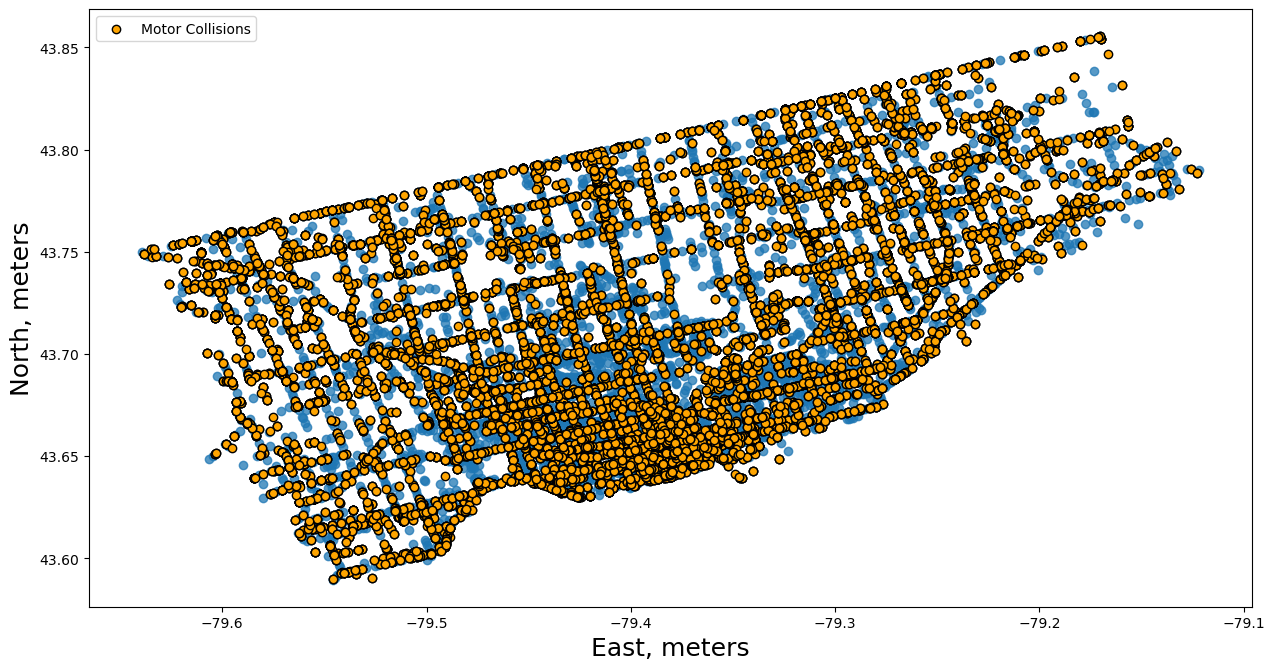

In [19]:
#Plot intersections_gdf + motor_collisions_gdf
import matplotlib.pyplot as plt

ax = intersections_gdf.plot(figsize=(15, 8), alpha=0.75)
motor_collisions_gdf.plot(ax=ax, color='orange', edgecolor='k', label='Motor Collisions')
plt.xlabel('East, meters', fontsize=18) #assigning x axis label
plt.ylabel('North, meters', fontsize=18) #assigning y axis label
plt.legend() #including a legend

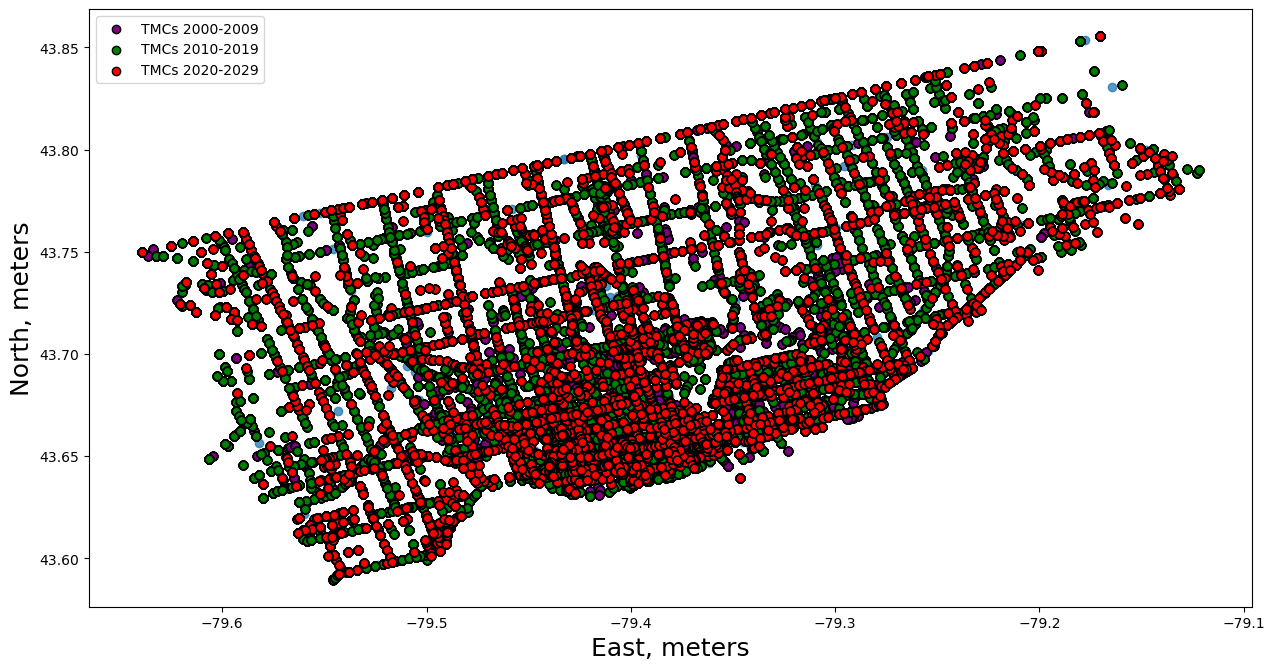

In [20]:
#Plot intersections_gdf + vol gdfs
import matplotlib.pyplot as plt

ax = intersections_gdf.plot(figsize=(15, 8), alpha=0.75)
vol_00to09_gdf.plot(ax=ax, color='purple', edgecolor='k', label='TMCs 2000-2009')
vol_10to19_gdf.plot(ax=ax, color='green', edgecolor='k', label='TMCs 2010-2019')
vol_20to29_gdf.plot(ax=ax, color='red', edgecolor='k', label='TMCs 2020-2029')
plt.xlabel('East, meters', fontsize=18) #assigning x axis label
plt.ylabel('North, meters', fontsize=18) #assigning y axis label
plt.legend() #including a legend

In [21]:
#The geodataframes made in this notebook will be saved to be referenced for future analysis
#vol_00to09_gdf.to_file("vol_00to09_gdf.geojson", driver="GeoJSON")
#vol_10to19_gdf.to_file("vol_10to19_gdf.geojson", driver="GeoJSON")
#vol_20to29_gdf.to_file("vol_20to29_gdf.geojson", driver="GeoJSON")
#intersections_gdf.to_file("intersections_gdf.geojson", driver="GeoJSON")
#motor_collisions_gdf.to_file("motor_collisions_gdf.geojson", driver="GeoJSON")

## 3: Creating a Master Dataframe
The following file looks to create a master dataframe that combines the turning movement count volumes data with each collision in the motor vehicle collision dataframe.

In [22]:
# Combine all volume GeoDataFrames into one
volumes_gdf = pd.concat([vol_20to29_gdf, vol_10to19_gdf, vol_00to09_gdf], ignore_index=True)

# Print the combined GeoDataFrame
volumes_gdf.head()

_id  count_id  count_date  location_id                       location  \
0    1     39337  2020-01-08        13060  BROADVIEW AVE AT ERINDALE AVE   
1    2     39337  2020-01-08        13060  BROADVIEW AVE AT ERINDALE AVE   
2    3     39337  2020-01-08        13060  BROADVIEW AVE AT ERINDALE AVE   
3    4     39337  2020-01-08        13060  BROADVIEW AVE AT ERINDALE AVE   
4    5     39337  2020-01-08        13060  BROADVIEW AVE AT ERINDALE AVE   

         lng        lat  centreline_type  centreline_id  px  ... wx_peds  \
0 -79.358652  43.677521              2.0     13462138.0 NaN  ...     0.0   
1 -79.358652  43.677521              2.0     13462138.0 NaN  ...     0.0   
2 -79.358652  43.677521              2.0     13462138.0 NaN  ...     0.0   
3 -79.358652  43.677521              2.0     13462138.0 NaN  ...     0.0   
4 -79.358652  43.677521              2.0     13462138.0 NaN  ...     0.0   

  nx_bike  sx_bike  ex_bike  wx_bike  nx_other  sx_other  ex_other  wx_other  \
0     4.0      0.0      0.0      0.0       0.0       0.0       0.0       0.0   
1     3.0      0.0      0.0      0.0       0.0       0.0       0.0       0.0   
2     2.0      0.0      0.0      0.0       0.0       0.0       0.0       0.0   
3     2.0      1.0      0.0      0.0       0.0       0.0       0.0       0.0   
4     1.0      2.0      0.0      0.0       0.0       0.0       0.0       0.0   

                 geometry  
0  POINT (-79.359 43.678)  
1  POINT (-79.359 43.678)  
2  POINT (-79.359 43.678)  
3  POINT (-79.359 43.678)  
4  POINT (-79.359 43.678)  

[5 rows x 61 columns]

In [26]:
# Keep the years 2011-2022
# Filter motor_collisions_gdf
motor_collisions_gdf = motor_collisions_gdf[(motor_collisions_gdf['YEAR'] >= 2011) & (motor_collisions_gdf['YEAR'] <= 2022)]

# Filter volumes_gdf
volumes_gdf = volumes_gdf[(volumes_gdf['count_date'] >= '2011-01-01') & (volumes_gdf['count_date'] <= '2022-12-31')]

In [ ]:
##AFTER THIS POINT IDK

In [55]:
import folium
from folium.plugins import MarkerCluster
from folium import Marker  # Import the Marker class

# Create a map of Toronto
map_to = folium.Map(location=[43.6426, -79.3871], 
                   tiles='cartodbpositron', 
                   zoom_start=10)

# Add points to the map
mc = MarkerCluster()
for idx, row in motor_collisions_gdf.iterrows():
    mc.add_child(Marker([row.geometry.y, row.geometry.x]).add_to(map_to))

map_to.add_child(mc)
    
# Display map
map_to

In [45]:
import pandas as pd
from geopandas.tools import sjoin
from shapely.geometry import Point

# Assuming you have already loaded motor_collisions_gdf and volumes_gdf

# Convert the 'DATE' column in motor_collisions_gdf and 'count_date' column in volumes_gdf to datetime
motor_collisions_gdf['DATE'] = pd.to_datetime(motor_collisions_gdf['DATE'])
volumes_gdf['count_date'] = pd.to_datetime(volumes_gdf['count_date'])

# Sort both DataFrames by the key columns
motor_collisions_gdf = motor_collisions_gdf.sort_values('DATE')
volumes_gdf = volumes_gdf.sort_values('count_date')

# Create a copy of motor_collisions_gdf to avoid modifying the original DataFrame
master_df = motor_collisions_gdf.copy()

# Merge motor_collisions_gdf with volumes_gdf based on the date column
master_df = pd.merge_asof(master_df, volumes_gdf, left_on='DATE', right_on='count_date', direction='nearest')

# Find the closest intersection for each motor collision
master_df['nearest_intersection'] = None

for idx, row in master_df.iterrows():
    point = Point(row['geometry'].x, row['geometry'].y)
    nearest_idx = volumes_sindex.nearest(point)
    nearest_intersection = volumes_gdf.iloc[nearest_idx].copy()  # Copy the entire row
    master_df.at[idx, 'nearest_intersection'] = nearest_intersection

# Print the master DataFrame
print(master_df.head())

KeyError: 'geometry'

In [56]:
from folium.plugins import HeatMap
# Create a map of Toronto
map_to = folium.Map(location=[43.6426, -79.3871], 
                   tiles='cartodbpositron', 
                   zoom_start=10)

HeatMap(data=list(zip(motor_collisions_gdf.geometry.y,
                      motor_collisions_gdf.geometry.x)),
        radius=20).add_to(map_to)

map_to

In [36]:
motor_collisions_gdf.columns

Index(['_id', 'ACCNUM', 'YEAR', 'DATE', 'TIME', 'STREET1', 'STREET2', 'OFFSET',
       'ROAD_CLASS', 'DISTRICT', 'WARDNUM', 'LOCCOORD', 'ACCLOC', 'TRAFFCTL',
       'VISIBILITY', 'LIGHT', 'RDSFCOND', 'ACCLASS', 'IMPACTYPE', 'INVTYPE',
       'INVAGE', 'INJURY', 'FATAL_NO', 'INITDIR', 'VEHTYPE', 'MANOEUVER',
       'DRIVACT', 'DRIVCOND', 'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE',
       'CYCACT', 'CYCCOND', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE',
       'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER',
       'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'HOOD_158',
       'NEIGHBOURHOOD_158', 'HOOD_140', 'NEIGHBOURHOOD_140', 'DIVISION',
       'type', 'coordinates', 'lon', 'lat', 'geometry'],
      dtype='object')

In [31]:
motor_collisions_gdf['INITDIR'].unique()

array(['None', 'West', 'East', 'South', 'North', 'Unknown'], dtype=object)

In [32]:
motor_collisions_gdf['MANOEUVER'].unique()

array(['None', 'Turning Left', 'Going Ahead', 'Reversing',
       'Pulling Onto Shoulder or towardCurb',
       'Pulling Away from Shoulder or Curb', 'Slowing or Stopping',
       'Turning Right', 'Changing Lanes', 'Other', 'Overtaking',
       'Unknown', 'Stopped', 'Parked', 'Making U Turn', 'Merging',
       'Disabled'], dtype=object)

In [42]:
motor_collisions_gdf['DATE']

6000     2011-03-09
6001     2011-03-09
6002     2011-03-09
6003     2011-03-09
6004     2011-03-12
            ...    
18189    2022-12-21
18190    2022-12-21
18191    2022-12-21
18192    2022-12-30
18193    2022-12-30
Name: DATE, Length: 11566, dtype: object

In [41]:
volumes_gdf['count_date']

0         2020-01-08
1         2020-01-08
2         2020-01-08
3         2020-01-08
4         2020-01-08
             ...    
379365    2019-07-17
379366    2019-07-17
379367    2019-07-17
379368    2019-07-17
379369    2019-07-17
Name: count_date, Length: 333482, dtype: object

In [23]:
volumes_gdf.columns

Index(['_id', 'count_id', 'count_date', 'location_id', 'location', 'lng',
       'lat', 'centreline_type', 'centreline_id', 'px', 'time_start',
       'time_end', 'sb_cars_r', 'sb_cars_t', 'sb_cars_l', 'nb_cars_r',
       'nb_cars_t', 'nb_cars_l', 'wb_cars_r', 'wb_cars_t', 'wb_cars_l',
       'eb_cars_r', 'eb_cars_t', 'eb_cars_l', 'sb_truck_r', 'sb_truck_t',
       'sb_truck_l', 'nb_truck_r', 'nb_truck_t', 'nb_truck_l', 'wb_truck_r',
       'wb_truck_t', 'wb_truck_l', 'eb_truck_r', 'eb_truck_t', 'eb_truck_l',
       'sb_bus_r', 'sb_bus_t', 'sb_bus_l', 'nb_bus_r', 'nb_bus_t', 'nb_bus_l',
       'wb_bus_r', 'wb_bus_t', 'wb_bus_l', 'eb_bus_r', 'eb_bus_t', 'eb_bus_l',
       'nx_peds', 'sx_peds', 'ex_peds', 'wx_peds', 'nx_bike', 'sx_bike',
       'ex_bike', 'wx_bike', 'nx_other', 'sx_other', 'ex_other', 'wx_other',
       'geometry'],
      dtype='object')

In [24]:
volumes_gdf['count_date']

0         2020-01-08
1         2020-01-08
2         2020-01-08
3         2020-01-08
4         2020-01-08
             ...    
638073    2003-07-09
638074    2003-07-09
638075    2003-07-09
638076    2003-07-09
638077    2003-07-09
Name: count_date, Length: 638078, dtype: object

In [33]:
volumes_gdf['time_start']

0         2020-01-08T07:30:00
1         2020-01-08T07:45:00
2         2020-01-08T08:00:00
3         2020-01-08T08:15:00
4         2020-01-08T08:30:00
                 ...         
379365    2019-07-17T16:45:00
379366    2019-07-17T17:00:00
379367    2019-07-17T17:15:00
379368    2019-07-17T17:30:00
379369    2019-07-17T17:45:00
Name: time_start, Length: 333482, dtype: object